In [0]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import seaborn

In [0]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Importing Virginia Beach Housing Data
url = "https://raw.githubusercontent.com/jjh5bc/ML4VA/master/Property_Sales.csv?token=AJ6FSTPP3O4WVSMEVDMGKFK5YIXLO"
vb_housing = pd.read_csv(url)
vb_housing.head(10)
#list(vb_housing)
vb_housing.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GPIN,Street Address,Zip Code,Neighborhood,Land Value,Improvement Value,Total Value,Land USE (Y/N),Sale Date,Sale Price,Document Number,Deed Book,Deed Page,Location 1
0,24102120390000,NaN,NaN,Pungo Land Use,456700,0,456700,Yes,09/27/2018,0,20180927000799560,NaN,NaN,"Virginia Beach, VA\n(36.845117, -75.975518)"
1,24177241280000,NaN,NaN,Birdneck Rd,491500,0,491500,No,05/08/2014,0,20140508000402150,NaN,NaN,"Virginia Beach, VA\n(36.845117, -75.975518)"
2,24033860900000,2340 Esplanade Dr,23456-6527,Foxfire,125000,185700,310700,No,05/22/2019,0,20190522000411650,NaN,NaN,"2340 Esplanade Dr\nVirginia Beach, VA 23456-65..."
3,24088285730000,832 Quail Pointe Cv,23454-3156,Linkhorn Estates Waterfront,595000,432800,1027800,No,05/22/2015,0,20150522000468110,NaN,NaN,"832 Quail Pointe Cv\nVirginia Beach, VA 23454-..."
4,14952974580000,1229 Blue Jay Dr,23453-2901,Cardinal Estates,50000,145200,195200,No,02/09/2001,0,000000000000000,4343,2083.0,"1229 Blue Jay Dr\nVirginia Beach, VA 23453-290..."
5,24089348780000,1536 Quail Point Rd,23454,Linkhorn Estates Waterfront,450000,16300,466300,No,02/11/2011,0,20110211000146230,NaN,NaN,"1536 Quail Point Rd\nVirginia Beach, VA 23454\..."
6,14786709010000,4040 Mason St,23455-5550,Reid Town,142800,228500,371300,No,05/05/2019,0,20171013000881550,NaN,NaN,"4040 Mason St\nVirginia Beach, VA 23455-5550\n..."
7,14673002880000,5390 Susquehanna Dr,23462-5907,Carolanne Farm/Point,110000,99700,209700,No,05/22/2019,0,20190522000412010,NaN,NaN,"5390 Susquehanna Dr\nVirginia Beach, VA 23462-..."
8,14775948440000,4516 S Hessian Rd,23462-2312,Pembroke Manor,88900,161600,250500,No,05/22/2019,0,20190522000413200,NaN,NaN,"4516 S Hessian Rd\nVirginia Beach, VA 23462-23..."
9,24170476630000,116 N Oceana Blvd,23454,Oceana East,81000,241500,322500,No,06/28/2018,89000,20180628000525960,NaN,NaN,"116 N Oceana Blvd\nVirginia Beach, VA 23454\n(..."


In [0]:
#from sklearn.model_selection import train_test_split
#x_attribs = ['GPIN', 'Street Address', 'Zip Code', 'Neighborhood', 'Land Value', 'Improvement Value', 'Sale Price', 'Sale Date']
#drop_attribs = ['Land Value', 'Street Address', 'Location 1']
#y_attribs = ['Total Value']
#train_set_x, test_set_x = train_test_split(vb_housing[x_attribs], test_size=0.2, random_state=42)
#train_set_y, test_set_y = train_test_split(vb_housing[y_attribs], test_size=0.2, random_state=42)
#train_set_x.head(10)

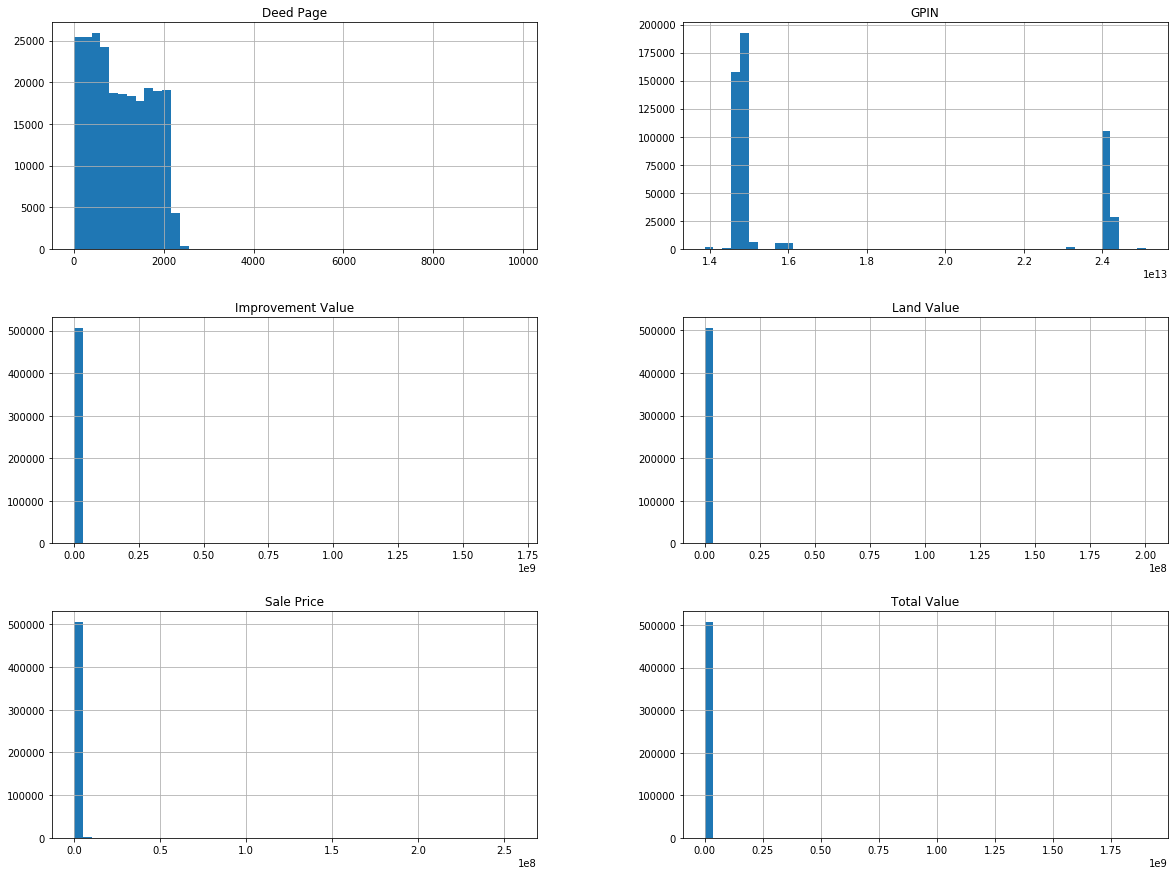

In [0]:
%matplotlib inline
vb_housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [0]:
dates = []
for i in range(507228):
  try:
    dates.append(int(vb_housing['Sale Date'][i].split('/')[-1]))
  except:
    dates.append(None)

In [0]:
vb_housing['dates'] = dates
vb_housing = vb_housing.drop('Sale Date',axis=1)
vb_housing = vb_housing.drop('Location 1',axis=1)
vb_housing = vb_housing.drop('Deed Page',axis=1)
vb_housing = vb_housing.drop('Deed Book',axis=1)
vb_housing = vb_housing.drop('Street Address',axis=1)
vb_housing = vb_housing.drop('Document Number',axis=1)
vb_housing = vb_housing.drop('Land Value',axis=1)
vb_housing.shape

(507228, 8)

In [0]:
list(vb_housing)

['GPIN',
 'Zip Code',
 'Neighborhood',
 'Improvement Value',
 'Total Value',
 'Land USE (Y/N)',
 'Sale Price',
 'dates']

In [0]:
vb_housing = vb_housing.dropna()

In [0]:
sample_incomplete_rows = vb_housing[vb_housing.isnull().any(axis=1)]
sample_incomplete_rows

,GPIN,Zip Code,Neighborhood,Improvement Value,Total Value,Land USE (Y/N),Sale Price,dates


In [0]:
num_pipeline = Pipeline([
        # the imputer doesn't really matter in this case because there is no missing data
        ('std_scaler', StandardScaler()),
    ])
X_attribs = ['GPIN','Zip Code','Neighborhood','Improvement Value','Land USE (Y/N)','Sale Price','dates']
y_attribs = ['Total Value']
numerical_attribs = list(vb_housing.select_dtypes(include=[np.number]).drop("Total Value", axis=1))
category_attribs = ['Zip Code','Neighborhood','Land USE (Y/N)',]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_attribs),
        ("cat", OneHotEncoder(), category_attribs),
    ])

In [0]:
vb_housing.shape

(494807, 8)

In [0]:
vb_housing

,GPIN,Zip Code,Neighborhood,Improvement Value,Total Value,Land USE (Y/N),Sale Price,dates
2,24033860900000,23456-6527,Foxfire,185700,310700,No,0,2019.0
3,24088285730000,23454-3156,Linkhorn Estates Waterfront,432800,1027800,No,0,2015.0
4,14952974580000,23453-2901,Cardinal Estates,145200,195200,No,0,2001.0
5,24089348780000,23454,Linkhorn Estates Waterfront,16300,466300,No,0,2011.0
6,14786709010000,23455-5550,Reid Town,228500,371300,No,0,2019.0
...,...,...,...,...,...,...,...,...
507222,14807810340000,23457-1112,Blackwater,76000,190700,No,0,2015.0
507224,24140239290000,23456-3870,Three Oaks,343200,487200,No,208325,1992.0
507225,14888530600000,23452-6127,Middle Plantation,273000,541800,No,216500,1988.0
507226,14950813060000,23453-2832,Green Run Th,97900,143900,No,77500,2003.0


In [0]:
import random
risks = []
for i in range(vb_housing.shape[0]):
  risks.append(random.randint(0,5))
vb_housing['risk'] = risks

In [0]:
vb_housing.head(10)

,GPIN,Zip Code,Neighborhood,Improvement Value,Total Value,Land USE (Y/N),Sale Price,dates,risk
2,24033860900000,23456-6527,Foxfire,185700,310700,No,0,2019.0,4
3,24088285730000,23454-3156,Linkhorn Estates Waterfront,432800,1027800,No,0,2015.0,2
4,14952974580000,23453-2901,Cardinal Estates,145200,195200,No,0,2001.0,4
5,24089348780000,23454,Linkhorn Estates Waterfront,16300,466300,No,0,2011.0,0
6,14786709010000,23455-5550,Reid Town,228500,371300,No,0,2019.0,3
7,14673002880000,23462-5907,Carolanne Farm/Point,99700,209700,No,0,2019.0,4
8,14775948440000,23462-2312,Pembroke Manor,161600,250500,No,0,2019.0,4
9,24170476630000,23454,Oceana East,241500,322500,No,89000,2018.0,5
10,14678816745408,23462-1969,Summerset/Garnett Point Lakes,126800,207800,No,238000,2019.0,4
11,14978011770000,23454,London Brdg Xng/Evergreens,248100,366500,No,400000,2019.0,0


In [0]:
features = vb_housing[X_attribs]
features = full_pipeline.fit_transform(features)

In [0]:
features[0]

<1x20241 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [0]:
#train_set_X, test_set_X = train_test_split(features, test_size=0.2, random_state=42)
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)
# split only the charges (target value)
train_set_y, test_set_y = train_test_split(vb_housing[y_attribs], test_size=0.2, random_state=42)

y_train = num_pipeline.fit_transform(train_set_y)  # does not have categorical, only the charges
#X_train = full_pipeline.fit_transform(train_set_X) # has categorical
y_test = num_pipeline.fit_transform(test_set_y)    # does not have categorical, only the charges
#X_test = full_pipeline.fit_transform(test_set_X) 

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lin_reg.predict(features[0])[0][0]

-0.0160682956172706

In [0]:
d = lin_reg.predict(features[0])
num_pipeline.inverse_transform(d)

array([[344252.87122379]])

In [0]:
def econ_loss(feature_set, year):
  cost = num_pipeline.inverse_transform(lin_reg.predict(features[feature_set]))[0][0]
  risk = risks[feature_set]
  if year > risk:
    return cost
  return 0
econ_loss(3,4)

412729.1177317636

In [0]:
X_test.shape

(98962, 20241)

In [0]:
X_train.shape

(395845, 20241)

In [0]:
from sklearn.metrics import mean_squared_error
lin_predictions = lin_reg.predict(X_test)

lin_reg_mse = mean_squared_error(y_test, lin_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

0.7491668545495284

In [0]:
lin_reg.score(X_train, y_train)

0.9964045247958285

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [0]:
np.mean(tree_rmse_scores)

0.06373747070264027

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error
rf_predictions = forest_reg.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.7795973361783928

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

# Visualization of coordinates using geopandas

In [0]:
!pip3 install geopandas
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [0]:
c = 0
points = []
for i in range(507228):
  try:
    points.append(vb_housing['Location 1'][i].split('\n')[2])
  except:
    c = c + 1
c

12292

In [0]:
latitude = []
longitude = []
for i in range(len(points)):
  latitude.append(float(points[i].strip('(').strip(')').split()[0].strip(',')))
  longitude.append(float(points[i].strip('(').strip(')').split()[1]))

In [0]:
!SHAPE_RESTORE_SHX=YES fio info City_of_Virginia_Beach_Boundary.shp
!SHAPE_RESTORE_SHX=YES fio info City_Property.shp
vb_map = gpd.read_file('City_of_Virginia_Beach_Boundary.shp')
vb_better_map = gpd.read_file('City_Property.shp')

{"driver": "ESRI Shapefile", "schema": {"properties": {}, "geometry": "Polygon"}, "crs": "", "crs_wkt": "", "bounds": [-76.22805576121755, 36.550375084838414, -75.86756153137485, 36.93259325263383], "name": "City_of_Virginia_Beach_Boundary", "count": 1}
{"driver": "ESRI Shapefile", "schema": {"properties": {}, "geometry": "Polygon"}, "crs": "", "crs_wkt": "", "bounds": [-76.22650735492523, 36.57984267211846, -75.91980776030165, 36.92142321811987], "name": "City_Property", "count": 2270}


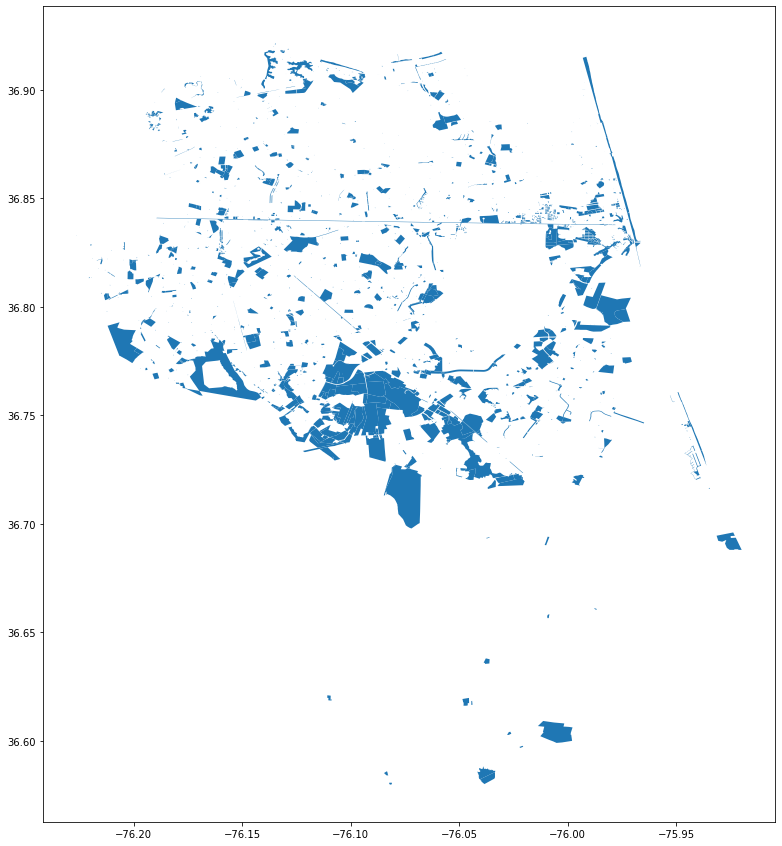

In [0]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,15))
vb_better_map.plot(ax=ax)

In [0]:
data = {'Longitude':longitude,'Latitude':latitude}
df = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init':'epsg.4326'}
geo_df = gpd.GeoDataFrame(df,crs=crs,geometry=geometry)
geometry[:3]

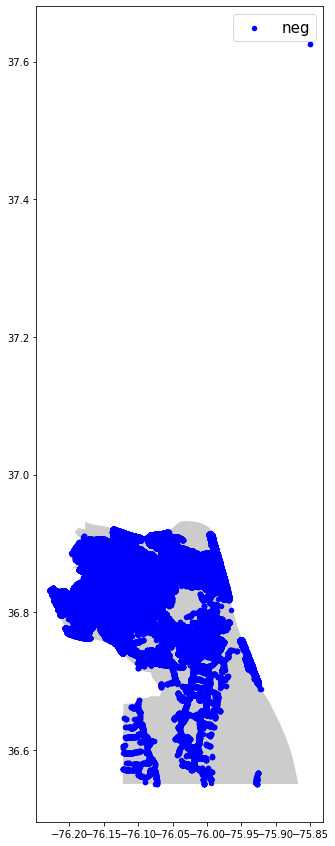

In [0]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,15))
vb_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['Longitude']!=0].plot(ax=ax, markersize=20, color='blue', marker='o',label='neg')
plt.legend(prop={'size':15})

![alt text](https://github.com/ur6yr/ML4VA/raw/master/slr.png)